In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scienceplots

plt.style.use(["bmh", "science", "notebook", "grid"])

In [2]:
PRIMARY = "#0072b2"
PRIMARY_DARK = "navy"
SECONDARY = "#a60628"
SECONDARY_DARK = "#79011B"
TERCIARY = "firebrick"
ALTERNATIVE = "forestgreen"
ALTERNATIVE_DARK = "darkolivegreen"
TEXT_COLOR = "#212121"
plt.rc("font", family="Arial")
FONT_SIZE = 19
LABEL_SIZE = 16

In [6]:
# loading all packages
imp_30hz = np.load("E:/Universidade/Dados_Sísmicos/Data/impedance_30hz.npy")
imp_background = np.load("E:/Universidade/Dados_Sísmicos/Data/impedance_background.npy")
inverted_impedance_final_butter = np.load(
    "E:/Universidade/Dados_Sísmicos/Data/inverted_impedance_butter.npy"
)
inverted_impedance_final_ricker = np.load(
    "E:/Universidade/Dados_Sísmicos/Data/inverted_impedance_ricker.npy"
)
# residuo_ricker = np.load("E:/Universidade/Dados_Sísmicos/Data/residuo_ricker.npy")
# residuo_butter = np.load("E:/Universidade/Dados_Sísmicos/Data/residuo_butter.npy")

residuo_ricker = imp_30hz - inverted_impedance_final_ricker
residuo_butter = imp_30hz - inverted_impedance_final_butter

# BINS

In [4]:
import seaborn as sns
from matplotlib.ticker import ScalarFormatter

bins = 30

# # Flatten the 3D arrays to 1D using ravel
# residuo_flat_ricker = residuo_ricker.ravel()
# residuo_flat_butter = residuo_butter.ravel()

# # Calculate standard deviations
# residuo_flat_butter_std = np.std(residuo_flat_butter)
# residuo_flat_ricker_std = np.std(residuo_flat_ricker)

# Calculate histograms using numpy
hist_original, bin_edges_original = np.histogram(imp_30hz, bins=bins, density=True)
hist_ricker, bin_edges_ricker = np.histogram(inverted_impedance_final_ricker, bins=bins, density=True)
hist_butter, bin_edges_butter = np.histogram(inverted_impedance_final_butter, bins=bins, density=True)



AttributeError: 'Figure' object has no attribute 'xlabel'

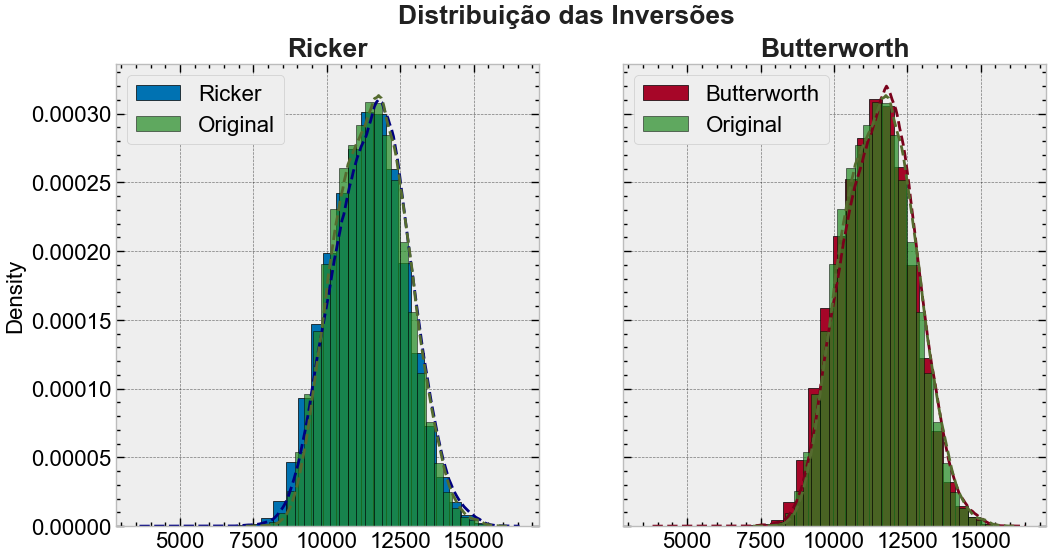

In [5]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6), sharey=True, sharex=True)

fig.suptitle("Distribuição das Inversões", fontsize=FONT_SIZE, fontweight="bold", color=TEXT_COLOR)

# Plot histogram for ricker on axs[0]
axs[0].bar(
    bin_edges_butter[:-1], hist_butter, width=np.diff(bin_edges_butter),
    edgecolor="black", color=PRIMARY, alpha=1, label="Ricker"
)

# Plot histogram for original on axs[0]
axs[0].bar(
    bin_edges_original[:-1], hist_original, width=np.diff(bin_edges_original),
    edgecolor="black", color=ALTERNATIVE, alpha=0.7, label="Original"
)

# KDE plot for inverted_impedance_final_butter on axs[0]
sns.kdeplot(
    inverted_impedance_final_butter.flatten(), color=PRIMARY_DARK,
    linewidth=2, linestyle="--", alpha=1.0, bw_adjust=0.5, ax=axs[0]
)

# KDE plot for imp_30hz on axs[0]
sns.kdeplot(
    imp_30hz.flatten(), color=ALTERNATIVE_DARK, linewidth=2,
    linestyle="--", alpha=1.0, bw_adjust=0.5, ax=axs[0]
)

axs[0].tick_params(axis="both", labelsize=LABEL_SIZE)
axs[0].set_title("Ricker", fontsize=FONT_SIZE, fontweight="bold", color=TEXT_COLOR)
axs[0].legend(loc="upper left", fontsize=FONT_SIZE - 3)

# Assuming axs is defined as part of a subplot structure, e.g., fig, axs = plt.subplots(1, 2)

# Plot histogram for ricker on axs[1]
axs[1].bar(
    bin_edges_ricker[:-1], hist_ricker, width=np.diff(bin_edges_ricker),
    edgecolor="black", color=SECONDARY, alpha=1, label="Butterworth"
)

# Plot histogram for original on axs[1]
axs[1].bar(
    bin_edges_original[:-1], hist_original, width=np.diff(bin_edges_original),
    edgecolor="black", color=ALTERNATIVE, alpha=0.7, label="Original"
)

# KDE plot for inverted_impedance_final_ricker on axs[1]
sns.kdeplot(
    inverted_impedance_final_ricker.flatten(), color=SECONDARY_DARK,
    linewidth=2, linestyle="--", alpha=1.0, bw_adjust=0.5, ax=axs[1]
)

# KDE plot for imp_30hz on axs[1]
sns.kdeplot(
    imp_30hz.flatten(), color=ALTERNATIVE_DARK, linewidth=2,
    linestyle="--", alpha=1.0, bw_adjust=0.5, ax=axs[1]
)

axs[1].tick_params(axis="both", labelsize=LABEL_SIZE)
axs[1].set_title("Butterworth", fontsize=FONT_SIZE, fontweight="bold", color=TEXT_COLOR)
axs[1].legend(loc="upper left", fontsize=FONT_SIZE - 3)

fig.xlabel(0.5, 0.04, r"Impedância $(\text{m}/\text{s})\cdot(\text{g}/\text{cm}^{2})$", ha='center', fontsize=FONT_SIZE, color=TEXT_COLOR)

# plt.supxlabel(r"Impedância $(\text{m}/\text{s})\cdot(\text{g}/\text{cm}^{2})$", fontsize=FONT_SIZE, color=TEXT_COLOR)
plt.tight_layout()
plt.show()

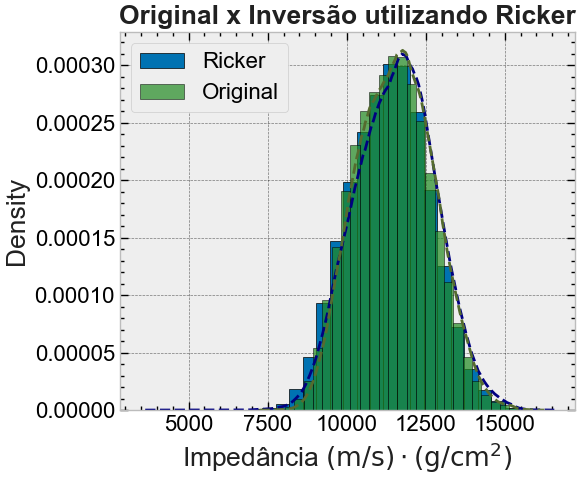

In [5]:
# Plotting
plt.figure(figsize=(6, 5))

# Plot histogram for ricker
plt.bar(
    bin_edges_butter[:-1], hist_butter, width=np.diff(bin_edges_butter),
    edgecolor="black", color=PRIMARY, alpha=1, label="Ricker"
)

# Plot histogram for original
plt.bar(
    bin_edges_original[:-1], hist_original, width=np.diff(bin_edges_original),
    edgecolor="black", color=ALTERNATIVE, alpha=0.7, label="Original"
)

sns.kdeplot(
    inverted_impedance_final_butter.flatten(), color=PRIMARY_DARK,
    linewidth=2, linestyle="--", alpha=1.0, bw_adjust=0.5
)

sns.kdeplot(
    imp_30hz.flatten(), color=ALTERNATIVE_DARK, linewidth=2,
    linestyle="--", alpha=1.0, bw_adjust=0.5
)

plt.tick_params(axis="both", labelsize=LABEL_SIZE)
plt.title("Original x Inversão utilizando Ricker", fontsize=FONT_SIZE, fontweight="bold", color=TEXT_COLOR)
plt.xlabel(
    r"Impedância $(\text{m}/\text{s})\cdot(\text{g}/\text{cm}^{2})$",
    fontsize=FONT_SIZE, color=TEXT_COLOR
)
plt.ylabel("Density", fontsize=FONT_SIZE, color=TEXT_COLOR)

plt.legend(loc="upper left", fontsize=FONT_SIZE - 3)

plt.tight_layout()
plt.savefig("simposio_figs/distribuicao_original_ricker_inversao.png", dpi=500, bbox_inches="tight")
plt.show()

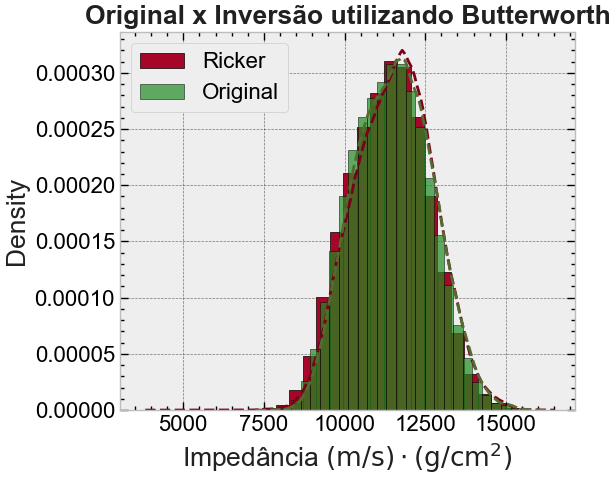

In [6]:
# Plotting
plt.figure(figsize=(6, 5))

# Plot histogram for ricker
plt.bar(
    bin_edges_ricker[:-1], hist_ricker, width=np.diff(bin_edges_ricker),
    edgecolor="black", color=SECONDARY, alpha=1, label="Ricker"
)

# Plot histogram for original
plt.bar(
    bin_edges_original[:-1], hist_original, width=np.diff(bin_edges_original),
    edgecolor="black", color=ALTERNATIVE, alpha=0.7, label="Original"
)

sns.kdeplot(
    inverted_impedance_final_ricker.flatten(), color=SECONDARY_DARK,
    linewidth=2, linestyle="--", alpha=1.0, bw_adjust=0.5
)

sns.kdeplot(
    imp_30hz.flatten(), color=ALTERNATIVE_DARK, linewidth=2,
    linestyle="--", alpha=1.0, bw_adjust=0.5
)

plt.tick_params(axis="both", labelsize=LABEL_SIZE)
plt.title("Original x Inversão utilizando Butterworth", fontsize=FONT_SIZE, fontweight="bold", color=TEXT_COLOR)
plt.xlabel(
    r"Impedância $(\text{m}/\text{s})\cdot(\text{g}/\text{cm}^{2})$",
    fontsize=FONT_SIZE, color=TEXT_COLOR
)
plt.ylabel("Density", fontsize=FONT_SIZE, color=TEXT_COLOR)

plt.legend(loc="upper left", fontsize=FONT_SIZE - 3)

plt.tight_layout()
plt.savefig("simposio_figs/distribuicao_original_butter_inversao.png", dpi=500, bbox_inches="tight")
plt.show()

In [9]:
np.std(inverted_impedance_final_ricker), np.std(inverted_impedance_final_butter)

(np.float64(1216.6453301492695), np.float64(1261.3196610996997))

In [11]:
np.mean(inverted_impedance_final_ricker), np.mean(inverted_impedance_final_butter)

(np.float64(11552.682339183724), np.float64(11552.682030749555))

# Resto

In [7]:
np.max(imp_30hz)
np.max(inverted_impedance_final_butter)
np.max(inverted_impedance_final_ricker)

np.float64(16439.941128335646)

In [8]:
# imp_30hz = imp_30hz / np.max(imp_30hz)
# inverted_impedance_final_butter = inverted_impedance_final_butter / np.max(inverted_impedance_final_butter)
# inverted_impedance_final_ricker = inverted_impedance_final_ricker / np.max(inverted_impedance_final_ricker)

# residuo_ricker = imp_30hz - inverted_impedance_final_ricker
# residuo_butter = imp_30hz - inverted_impedance_final_butter

### MAPE

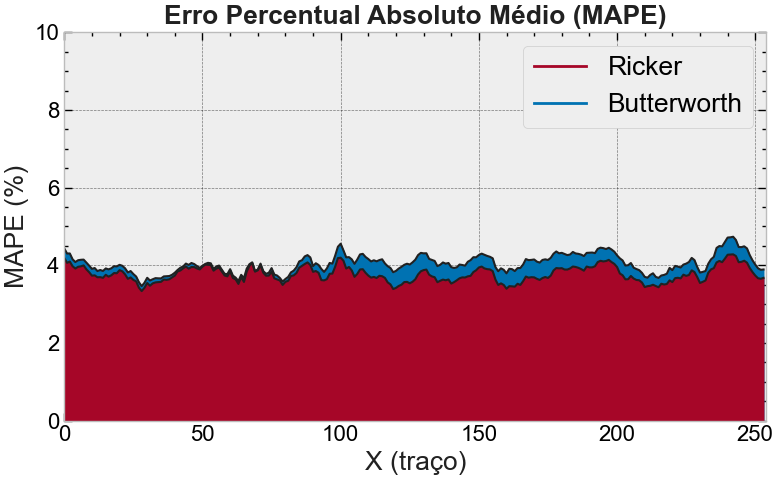

In [9]:
from sklearn.metrics import mean_absolute_percentage_error as MAPE
import matplotlib.lines as mlines

nx, ny, nz = imp_30hz.shape

ricker_inv = inverted_impedance_final_ricker
butter_inv = inverted_impedance_final_butter

mape_ricker = np.zeros(nx)
mape_butter = np.zeros(nx)

for ix in range(nx):
    mape_ricker[ix] = MAPE(imp_30hz[ix, 128, :], ricker_inv[ix, 128, :]) * 100
    mape_butter[ix] = MAPE(imp_30hz[ix, 128, :], butter_inv[ix, 128, :]) * 100

mape_ricker = np.delete(mape_ricker, slice(0, 2))
mape_butter = np.delete(mape_butter, slice(0, 2))


plt.figure(figsize=(8, 5))

plt.plot(
    mape_butter,
    "-",
    label="Butterworth",
    ms=2,
    linewidth=1.5,
    color=TEXT_COLOR,
    markeredgecolor="black",
    markeredgewidth=0.5,
)
plt.fill_between(range(len(mape_butter)), mape_butter, color=PRIMARY)

plt.plot(
    mape_ricker,
    "-",
    label="Ricker",
    ms=2,
    linewidth=1.5,
    color=TEXT_COLOR,
    markeredgecolor="black",
    markeredgewidth=0.5,
)
plt.fill_between(range(len(mape_ricker)), mape_ricker, color=SECONDARY)

# Create custom legend lines
line_ricker = mlines.Line2D(
    [], [], color=SECONDARY, marker="_", markersize=15, label="Ricker"
)
line_butter = mlines.Line2D(
    [], [], color=PRIMARY, marker="_", markersize=15, label="Butterworth"
)

plt.title(
    "Erro Percentual Absoluto Médio (MAPE)",
    fontsize=FONT_SIZE,
    fontweight="bold",
    color=TEXT_COLOR,
)
plt.xlabel("X (traço)", fontsize=FONT_SIZE, color=TEXT_COLOR)
plt.ylabel("MAPE (%)", fontsize=FONT_SIZE, color=TEXT_COLOR)
plt.tick_params(axis="both", labelsize=LABEL_SIZE)
plt.legend(handles=[line_ricker, line_butter], loc="upper right", fontsize=FONT_SIZE)
plt.ylim(0, 10)
plt.xlim(0, 254)

plt.tight_layout()
plt.savefig("simposio_figs/mape.png", dpi=500, bbox_inches="tight")
plt.show()

In [10]:
MAPE_b = np.delete(mape_butter, slice(0, 2))
MAPE_r = np.delete(mape_ricker, slice(0, 2))

In [11]:

print(f"A média do MAPE de Ricker é: {np.mean(MAPE_r):.2f}%")
print(f"A média do MAPE de Butterworth é: {np.mean(MAPE_b):.2f}%")

A média do MAPE de Ricker é: 3.77%
A média do MAPE de Butterworth é: 4.04%


In [12]:
mape_ricker_global = MAPE(imp_30hz.flatten(), ricker_inv.flatten()) * 100
mape_butter_global = MAPE(imp_30hz.flatten(), butter_inv.flatten()) * 100

print(f"A média do MAPE Global de Ricker é: {np.mean(mape_ricker_global):.2f}%")
print(f"A média do MAPE Global de Butterworth é: {np.mean(mape_butter_global):.2f}%")

A média do MAPE Global de Ricker é: 3.50%
A média do MAPE Global de Butterworth é: 3.75%


In [13]:
mape_ricker_global

np.float64(3.5002381597911603)

In [14]:
from scipy import stats

# 32, 64, 128, 196, 256
values = np.arange(0, 254, 6)

# section = 254
correlation_or = np.zeros(len(values))
correlation_ob = np.zeros(len(values))

for i, value in enumerate(values):

    correlation_or[i] = stats.pearsonr(
        imp_30hz[:, value, :].flatten(),
        inverted_impedance_final_ricker[:, value, :].flatten(),
    )[0]

    correlation_ob[i] = stats.pearsonr(
        imp_30hz[:, value, :].flatten(),
        inverted_impedance_final_butter[:, value, :].flatten(),
    )[0]

print(
    f"A correlação de Pearson entre o original e a inversão de Ricker é: {np.mean(correlation_or):.2f}"
)
print(
    f"A correlação de Pearson entre o original e a inversão de Butterworth é: {np.mean(correlation_ob):.2f}"
)

A correlação de Pearson entre o original e a inversão de Ricker é: 0.91
A correlação de Pearson entre o original e a inversão de Butterworth é: 0.90


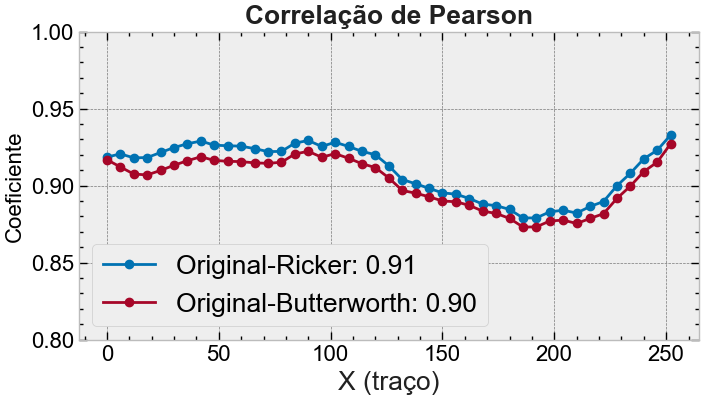

In [15]:
plt.figure(figsize=(8, 4))

plt.plot(
    values,
    correlation_or,
    "o-",
    label=f"Original-Ricker: {np.mean(correlation_or):.2f}",
    lw=2,
    color=PRIMARY,
)
plt.plot(
    values,
    correlation_ob,
    "o-",
    label=f"Original-Butterworth: {np.mean(correlation_ob):.2f}",
    lw=2,
    color=SECONDARY,
)


plt.title(
    "Correlação de Pearson", fontsize=FONT_SIZE, fontweight="bold", color=TEXT_COLOR
)


plt.legend(loc="lower left", fontsize=FONT_SIZE)
plt.ylim(0.8, 1.00)
plt.tick_params(axis="both", labelsize=LABEL_SIZE)
plt.ylabel("Coeficiente")
plt.xlabel("X (traço)", fontsize=FONT_SIZE, color=TEXT_COLOR)

plt.savefig("simposio_figs/correlacao_pearson.png", dpi=300, bbox_inches="tight")
plt.show()

In [16]:
# Flatten the 3D array to 1D using ravel
residuo_flat_ricker = residuo_ricker.ravel()
residuo_flat_butter = residuo_butter.ravel()

In [17]:
residuo_flat_butter_std = np.std(residuo_flat_butter)
residuo_flat_ricker_std = np.std(residuo_flat_ricker)

In [18]:
# Calculate histograms using numpy
bins = 30

hist_ricker, bin_edges_ricker = np.histogram(
    residuo_flat_ricker, bins=bins, density=True
)
hist_butter, bin_edges_butter = np.histogram(
    residuo_flat_butter, bins=bins, density=True
)

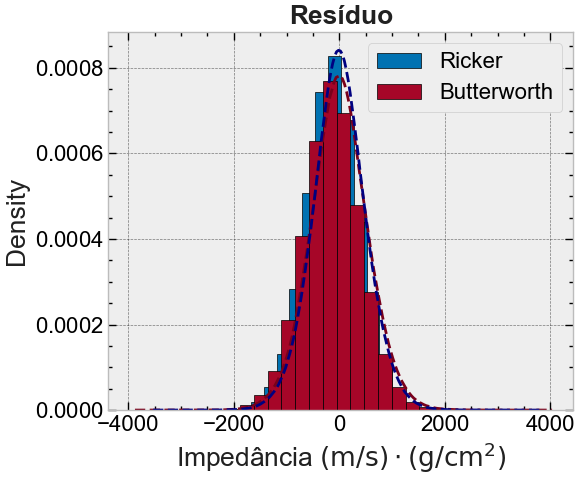

In [19]:
import seaborn as sns
from matplotlib.ticker import ScalarFormatter

bins = 30


plt.figure(figsize=(6, 5))

# Plot histogram for ricker
plt.bar(
    bin_edges_ricker[:-1],
    hist_ricker,
    width=np.diff(bin_edges_ricker),
    edgecolor="black",
    color=PRIMARY,
    alpha=1,
    label="Ricker",
)

# Plot histogram for butter
plt.bar(
    bin_edges_butter[:-1],
    hist_butter,
    width=np.diff(bin_edges_butter),
    edgecolor="black",
    color=SECONDARY,
    alpha=1,
    label="Butterworth",
)

# Create a KDE plot for butter
sns.kdeplot(
    residuo_flat_butter,
    color=SECONDARY_DARK,
    linewidth=2,
    linestyle="--",
    alpha=1.0,
    bw_adjust=0.5,
)

# Create a KDE plot for ricker
sns.kdeplot(
    residuo_flat_ricker,
    color=PRIMARY_DARK,
    linewidth=2,
    linestyle="--",
    alpha=1.0,
    bw_adjust=0.5,
)

plt.tick_params(axis="both", labelsize=LABEL_SIZE)
plt.title("Resíduo", fontsize=FONT_SIZE, fontweight="bold", color=TEXT_COLOR)
plt.xlabel(
    r"Impedância $(\text{m}/\text{s})\cdot(\text{g}/\text{cm}^{2})$",
    fontsize=FONT_SIZE,
    color=TEXT_COLOR,
)
plt.ylabel("Density", fontsize=FONT_SIZE, color=TEXT_COLOR)

plt.gca().yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
plt.gca().yaxis.get_offset_text().set_fontsize(LABEL_SIZE)
plt.gca().yaxis.get_offset_text().set_color(TEXT_COLOR)

plt.legend(loc="upper right", fontsize=FONT_SIZE - 3)

# Show the plot
plt.tight_layout()
plt.savefig("simposio_figs/distribuicao_residuo_october.png", dpi=500, bbox_inches="tight")
plt.savefig("simposio_figs/distribuicao_residuo_october.svg", dpi=500, bbox_inches="tight")
plt.show()

In [20]:
# print("Butter: ", residuo_flat_butter_std)
print(f"Butterworth: {residuo_flat_butter_std:.2f} (m/s)*(g/cm2)")

# print("Ricker: ", residuo_flat_ricker_std)
print(f"Ricker: {residuo_flat_ricker_std:.2f} (m/s)*(g/cm2)")

Butterworth: 543.65 (m/s)*(g/cm2)
Ricker: 508.82 (m/s)*(g/cm2)
